## 4-5. 워드클라우드 만들기 - 해시코드 질문 키워드

- bs4와 wordcloud를 이용해서 질문 키워드를 보여주는 시각화를 진행해봅시다.

### Target: 해시코드 질문 제목의 키워드

지난 실습에서 해시코드(https://hashcode.co.kr) 질문태그를 활용해 Bar Plot을 그렸다면,   
이번 실습에서는 질문 제목을 스크래핑한 후, 형태소 분석을 진행해서 워드클라우드를 그려봅시다.

In [3]:
# 다음 User-Agent를 추가해봅시다.

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}

In [6]:
# Pagination이 되어있는 질문 리스트의 제목을 모두 가져와 리스트 questions에 저장해봅시다.
# https://hashcode.co.kr/?page={i}
# 과도한 요청을 방지하기 위해 0.5초마다 요청을 보내봅시다.

import time
import requests
from bs4 import BeautifulSoup

questions = []

for i in range(1, 6):
    res = requests.get(f"https://hashcode.co.kr/?page={i}", user_agent)
    soup = BeautifulSoup(res.text, "html.parser")
    
    parsed_datas = soup.find_all("li", "question-list-item")
    
    for data in parsed_datas:
        
        questions.append(data.h4.text.strip())
    
    time.sleep(0.5)


In [13]:
questions

['Situs IDN Poker Online Resmi Terpercaya Indonesia',
 '자바 객체선언 오류 질문입니다!',
 '파이썬 간단한 코드 질문',
 '[ASP, VB.NET] API 제공 중인데 json 값 앞에 태그가 붙은 이유가 뭘까요?',
 "'''로 주석으로 만들었는데 왜 주석을 지우지 않으면 유니코드오류가 왜 나는지 모르겠어여",
 '#define 상수 선언떄',
 '우분투 vmware 가상머신 오류',
 '파이썬 멀티스레딩 질문',
 '파이썬 엑셀 파일 읽기',
 '머쓱이 스탬프 할때 답보기요',
 'BFS를 사용해도 무관한지 궁금합니다!',
 'C# 백준 25206 문제 뭐가 문제인지 확인시켜줄 고수분',
 'python 제너레이터화',
 '리액트 쿼리에서 useQuery를 어떻게 사용해야하나요',
 'html/javascript 로 node.js통해서 아두이노 통신관련',
 'Binary search tree',
 'Python 정규표현식을 사용한 패턴 추출',
 "code: 'MODULE_NOT_FOUND' 좀 도와주세요",
 '파이썬 데이터베이스 저장할때 다른방법없을까요?',
 '코딩테스트 첫번째 폰켓몬 문제 왜 맞는건가요?',
 '좋아요 한 문제만 따로 볼 수 있나요?',
 '멀티프로세싱 프로그램 실행시 수십개의 프로그램이 실행됩니다.',
 'c언어 왜 소수점을 넣어야 결과가 나오나',
 'HTML 전혀 모르는데요',
 'QR코드만 이용해서 앱 개발을 하면 많이 힘들까요?',
 '(생초보) 파이썬 *매개변수의 개수',
 '로지스틱 회귀',
 '프로그래머스 코딩테스트 2단계 구명보트에서',
 'Java 개인 연습 중 배열에서 오류가 났는데 해결 방법을 모르겠습니다.',
 '파이썬 csv 파일을 불러와 구분하는 방법에 대해 질문 드립니다',
 "다음의 xarray를 어떻게 'time' series로 변형할 수 있는지 여쭈어봅니다.",
 "'xlsx' file을 'nc' format으로 변환 후 저장하는 과정에서 계속 에러가

In [8]:
# 텍스트 구름을 그리기 위해 필요한 라이브러리를 불러와봅시다.

# 시각화에 쓰이는 라이브러리
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 횟수를 기반으로 딕셔너리 생성
from collections import Counter

# 문장에서 명사를 추출하는 형태소 분석 라이브러리
from konlpy.tag import Hannanum

한나눔에는 list가 아니라 str만 들어갈수 있으므로 list형태인 question을 수정해야 한다. 

In [14]:
# Hannanum 객체를 생성한 후, .nouns()를 통해 명사를 추출합니다.

words = []
hannanum = Hannanum()

for question in questions:
    
    nouns = hannanum.nouns(question)
    words += nouns # 누적해서 나오는 명사들
    
print(len(words))

1017


In [15]:
words

['자바',
 '객체선언',
 '오류',
 '질문',
 '파이썬',
 '한',
 '코드',
 '질문',
 '제공',
 '중',
 '값',
 '앞',
 '태그',
 '이유',
 '뭘까요',
 '주석',
 '주석',
 '유니코드오류',
 '모르겠어',
 '#define',
 '상수',
 '선언떄',
 '우분투',
 '가상머신',
 '오류',
 '파이썬',
 '멀티스레딩',
 '질문',
 '파이썬',
 '엑셀',
 '파',
 '읽기',
 '머쓱',
 '스탬프',
 '때',
 '답보기요',
 '사용',
 '무관한지',
 '궁금',
 'C#',
 '백준',
 '25206',
 '문제',
 '뭐',
 '문제',
 '확인',
 '고수분',
 '제너레이터화',
 '리액트',
 '쿼리',
 '사용',
 '로',
 'js통해서',
 '아두이노',
 '통신관련',
 '정규표현식',
 '사용',
 '패턴',
 '추출',
 "'MODULE_NOT_FOUND'",
 '파이썬',
 '데이터베이스',
 '저장',
 '때',
 '다른방법없을까요',
 '코딩테스트',
 '첫번',
 '폰켓몬',
 '문제',
 '것',
 '문제',
 '수',
 '멀티프로세싱',
 '프로그램',
 '실행시',
 '수십개',
 '프로그램',
 '실행',
 '언어',
 '소수점',
 '결과',
 '코드',
 '이용해서',
 '앱',
 '개발',
 '(생초보)',
 '파이썬',
 '매개변수',
 '개수',
 '로지스틱',
 '회귀',
 '프로그래머스',
 '코딩테스트',
 '2단계',
 '구명보트',
 '개',
 '연습',
 '중',
 '배열',
 '오류',
 '해결',
 '방법',
 '파이썬',
 '파일',
 '구분',
 '방법',
 '질문',
 '드',
 '다음',
 '변형',
 '수',
 '변환',
 '후',
 '저장',
 '과정',
 '에러',
 '1',
 '이',
 '해석',
 '파이썬',
 '클래스',
 '객체',
 '생성',
 '질문',
 '재정의',
 '때',
 '뭔지좀',
 '파이썬',
 '텍스트',


In [16]:
# counter를 이용해 각 단어의 개수를 세줍니다.

from collections import Counter

counter = Counter(words)
counter

Counter({'자바': 6,
         '객체선언': 1,
         '오류': 15,
         '질문': 53,
         '파이썬': 47,
         '한': 3,
         '코드': 14,
         '제공': 1,
         '중': 8,
         '값': 7,
         '앞': 1,
         '태그': 1,
         '이유': 3,
         '뭘까요': 2,
         '주석': 2,
         '유니코드오류': 1,
         '모르겠어': 1,
         '#define': 1,
         '상수': 1,
         '선언떄': 1,
         '우분투': 1,
         '가상머신': 1,
         '멀티스레딩': 1,
         '엑셀': 1,
         '파': 6,
         '읽기': 1,
         '머쓱': 1,
         '스탬프': 1,
         '때': 10,
         '답보기요': 1,
         '사용': 13,
         '무관한지': 1,
         '궁금': 4,
         'C#': 2,
         '백준': 1,
         '25206': 1,
         '문제': 17,
         '뭐': 3,
         '확인': 2,
         '고수분': 1,
         '제너레이터화': 1,
         '리액트': 1,
         '쿼리': 2,
         '로': 1,
         'js통해서': 1,
         '아두이노': 1,
         '통신관련': 1,
         '정규표현식': 1,
         '패턴': 2,
         '추출': 1,
         "'MODULE_NOT_FOUND'": 1,
         '데이터베이스': 1,

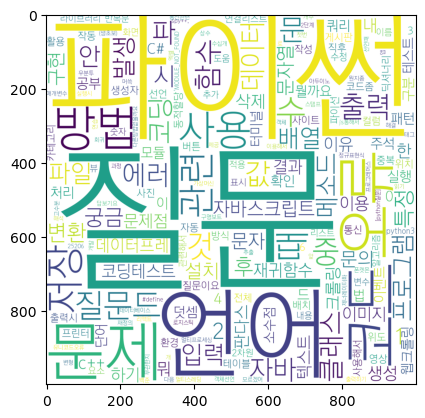

In [18]:
# WordCloud를 이용해 텍스트 구름을 만들어봅시다.

worldcloud = WordCloud(
font_path = "C:/Windows/Fonts/a고딕10.ttf",
width = 1000,
height = 1000,
background_color = "white")

# generate_from_frequencies함수는 counter같은 형태의 자료형(key:문자열, value:빈도)을 바탕으로
# 워크클라우드를 만드는 함수

img = worldcloud.generate_from_frequencies(counter)
plt.imshow(img)
plt.show()